In [2]:
import requests
import pandas
import seaborn
import re

%matplotlib inline

seaborn.set_style('whitegrid')

In [3]:
regex = re.compile('Est\. Salary \$(?P<low>\d+)k-\$(?P<high>\d+)k')


def download_salaries(url, page):
    r = requests.get(url.format(page=page),
                     headers={'User-Agent': 'Mozilla/5.0 (Windows NT x.y; rv:10.0) Gecko/20100101 Firefox/10.0'})
    r.raise_for_status()
    return regex.findall(r.content.decode('utf-8'))

In [57]:
urls = {
    "senior software engineer": "https://www.glassdoor.com/Job/la-jolla-senior-software-engineer-jobs-SRCH_IL.0,8_IC1147294_KO9,33_IP{page}.htm?lst=-1",
    "software engineer": "https://www.glassdoor.com/Job/la-jolla-software-engineer-jobs-SRCH_IL.0,8_IC1147294_KO9,26_IP{page}.htm?lst=-1",
    "junior software engineer": "https://www.glassdoor.com/Job/la-jolla-junior-software-engineer-jobs-SRCH_IL.0,8_IC1147294_KO9,33_IP{page}.htm?lst=-1",
    "python developer": "https://www.glassdoor.com/Job/la-jolla-python-developer-jobs-SRCH_IL.0,8_IC1147294_KO9,25_IP{page}.htm?lst=-1",
    "javascript developer": "https://www.glassdoor.com/Job/la-jolla-javascript-developer-jobs-SRCH_IL.0,8_IC1147294_KO9,29_IP{page}.htm?lst=-1",
    "devops engineer": "https://www.glassdoor.com/Job/la-jolla-devops-engineer-jobs-SRCH_IL.0,8_IC1147294_KO9,24_IP{page}.htm?lst=-1",
    "ux designer": "https://www.glassdoor.com/Job/la-jolla-ux-designer-jobs-SRCH_IL.0,8_IC1147294_KO9,20_IP{page}.htm?lst=-1",
}
max_pages = 10

In [58]:
import itertools
from collections import OrderedDict

job_salary_range = []
for job, url in urls.items():
    salary_ranges = list(itertools.chain(*[download_salaries(url, page) for page in range(1, max_pages + 1)]))
    for salary in salary_ranges:
        row = OrderedDict([('job_title', job), ('salary_low_range', int(salary[0])),
                           ('salary_high_range', int(salary[1]))])
        job_salary_range.append(row)

job_salary_range = pandas.DataFrame(job_salary_range)
job_salary_range['salary_low_range'] = job_salary_range['salary_low_range'] * 1000
job_salary_range['salary_high_range'] = job_salary_range['salary_high_range'] * 1000
job_salary_range['mean_salary_range'] = (job_salary_range['salary_low_range'] + job_salary_range[
    'salary_high_range']) / 2
job_salary_range.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 4 columns):
job_title            1525 non-null object
salary_low_range     1525 non-null int64
salary_high_range    1525 non-null int64
mean_salary_range    1525 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 47.7+ KB


In [55]:
job_salary_range.head()

,job_title,salary_low_range,salary_high_range,mean_salary_range
0,senior software engineer,91000,140000,115500.0
1,senior software engineer,122000,150000,136000.0
2,senior software engineer,78000,103000,90500.0
3,senior software engineer,95000,136000,115500.0
4,senior software engineer,88000,119000,103500.0


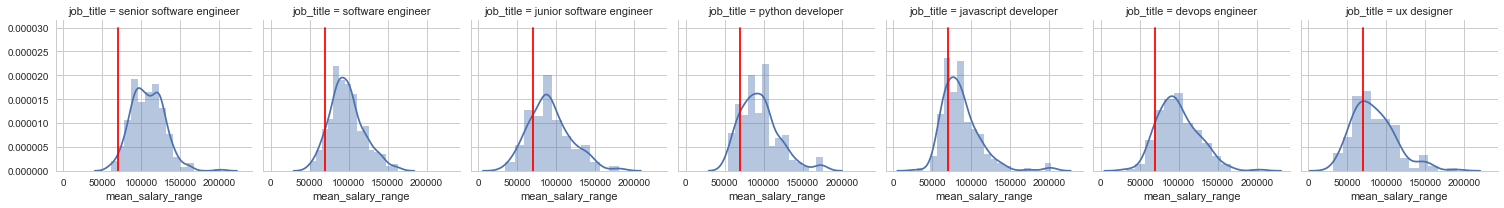

In [59]:
g = seaborn.FacetGrid(job_salary_range, col='job_title')

import matplotlib.pyplot as plt
from functools import partial

def fle_line_distplot(x, **kwargs):
    ax = plt.gca()
    ax = seaborn.distplot(x, ax=ax, **kwargs)
    ax.plot([70000, 70000],[0, .00003], 'r', linestyle='-')


g.map(fle_line_distplot, 'mean_salary_range')